# DL Assignment 1
## Contributor:
- Abhimanyu Gupta (2019226)
- Meenal Gurbaxani (2019434)

# Part 2 : Multilayer Perceptron

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler
import pickle

In [ ]:
random.seed(42)
np.random.seed(42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path = "/content/drive/MyDrive/DL_A1"
weights_folder = f"{folder_path}/weights"
plots_folder = f"{folder_path}/plots"

In [ ]:
train_df = pd.read_csv(folder_path + '/fashion-mnist_train.csv')
test_df = pd.read_csv(folder_path + '/fashion-mnist_test.csv')

In [ ]:
data_y = train_df['label'].to_numpy()
data_X = train_df.drop('label', axis=1).to_numpy()

train_samples = 50000
train_X, val_X = data_X[ : train_samples], data_X[train_samples : ]
train_y, val_y = data_y[ : train_samples], data_y[train_samples : ]

test_y = test_df['label'].to_numpy()
test_X = test_df.drop('label', axis=1).to_numpy()

In [ ]:
print(train_X.shape, train_y.shape, train_X[0].shape)
print(val_X.shape, val_y.shape)
print(test_X.shape, test_y.shape)

(50000, 784) (50000,) (784,)
(10000, 784) (10000,)
(10000, 784) (10000,)


In [ ]:
train_X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,
         0,   0,   0,  62,  61,  21,  29,  23,  51, 136,  61,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  88, 201, 228, 225, 255, 115,  62, 137, 255, 235, 222,
       255, 135,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  47, 252, 234, 238, 224, 215, 215, 229, 108, 180, 207,
       214, 224, 231, 249, 254,  45,   0,   0,   0,   0,   0,   0,   0,
         0,   1,   0,   0, 214, 222, 210, 213, 224, 225, 217, 22

In [ ]:
train_y[0]

2

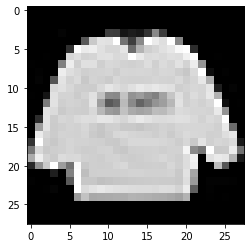

2

In [ ]:
# View a sample

plt.imshow(train_X[0].reshape(28, 28), cmap = 'gray')
plt.show()
train_y[0]

In [ ]:
# Standardardizing the input for gaussian distribution

mm = StandardScaler()
train_X = mm.fit_transform(train_X)
val_X = mm.transform(val_X)
test_X = mm.transform(test_X)

In [ ]:
train_X[0]

array([-1.00639786e-02, -2.72732834e-02, -4.34424710e-02, -4.17407878e-02,
       -5.70825845e-02, -7.03413053e-02, -9.73321934e-02, -1.55283179e-01,
       -2.39009998e-01, -3.77298604e-01, -5.68838173e-01, -6.92076624e-01,
       -7.57982847e-01, -7.47769446e-01, -7.47611334e-01, -7.73578151e-01,
       -7.56321944e-01, -6.44441397e-01, -5.04610893e-01, -3.21559265e-01,
       -2.02511078e-01, -1.38442022e-01, -1.09570714e-01, -9.18176545e-02,
       -6.70560647e-02, -4.89495103e-02, -3.12454449e-02, -1.33228199e-02,
       -1.18464020e-02, -1.68663166e-02, -3.36923994e-02, -5.40714380e-02,
       -7.87968723e-02, -1.30410575e-01, -2.43837890e-01, -3.64439611e-01,
       -4.87212691e-01, -6.42054409e-01, -8.32519013e-01, -1.00235979e+00,
       -1.09191619e+00, -1.08262714e+00, -1.06781727e+00, -1.10955768e+00,
       -1.09016068e+00, -9.39196617e-01, -7.79661530e-01, -5.95352969e-01,
       -4.41188190e-01, -3.17610067e-01, -2.07932295e-01, -1.49514278e-01,
       -1.18265854e-01, -

In [ ]:
class MulitLayerPerceptron :
    EPSILON = 1e-8

    def __init__(self, layers = [784, 200, 50, 10], num_epochs = 50, learning_rate = 1e-5, activation_function = 'tanh', batch_size = None, optimizer = 'gradient_descent') :
        '''
        Input :
            layers: number of neurons in each layer (including input layer)
            num_epochs: number of epochs the model should be trained for.
            learning_rate: Learning rate of the neural network. Default value = 1e-5.
            activation_function: the activation function to be used in the hidden layers (Softmax in output layer)
            batch_size: batch size to be used in each epoch
            optimizer: the optimizer to be used by the network.
        '''

        activations = {"relu" : [self.relu, self.relu_grad], "tanh" : [self.tanh, self.tanh_grad], "sigmoid" : [self.sigmoid, self.sigmoid_grad]}
        optimizers = {"gradient_descent" : self.gradient_descent, "gradient_momentum" : self.gradient_descent_with_momentum, "nag" : self.nag, "adagrad" : self.adagrad, "rmsprop" : self.rmsprop, "adam" : self.adam}
        self.layers = layers
        self.n_layers = len(layers)
        self.optimizer_name = optimizer
        self.optimizer = optimizers[optimizer]
        self.activation_name = activation_function
        self.activation = activations[activation_function]
        self.num_epochs = num_epochs
        self.learning_rate = learning_rate
        self.batch_size = batch_size

        self.train_loss = None
        self.val_loss = None
    
    def __str__(self) :
        return f"{self.layers}_{self.optimizer_name}_{self.activation_name}_{self.num_epochs}_{self.learning_rate}_{self.batch_size}"

    def weight_random_init(self, shape) :
        return np.random.normal(0, 1, shape) * 0.01

    def relu(self, x) :
        return np.where(x > 0, x, 0)
    
    def relu_grad(self, fx) :
        return np.where(fx > 0, 1, 0)

    def tanh(self, x) :
        return np.tanh(x)

    def tanh_grad(self, fx) :
        return 1 - fx**2

    def sigmoid(self, x) :
        return np.true_divide(1, 1 + np.exp(-x))

    def sigmoid_grad(self, fx) :
        return fx * (1 - fx)
    
    def softmax(self, x) :
        '''
            Numerically stable softmax
        '''

        exp = np.exp(x - np.max(x))

        return np.true_divide(exp, exp.sum(axis = 0, keepdims = True))    

    def gradient_descent(self, grads) :
        for i in range(1, self.n_layers) :
            self.weights[i] = self.weights[i] - self.learning_rate * grads[i]

    def gradient_descent_with_momentum(self, grads) :
        beta = 0.9
        for i in range(1, self.n_layers) :
            self.momentum[i] = beta * self.momentum[i] - self.learning_rate * grads[i]
            self.weights[i] = self.weights[i] + self.momentum[i]

    def nag(self, grads) :
        beta = 0.9
        for i in range(1, self.n_layers) :
            self.momentum[i] = beta * self.momentum[i] - self.learning_rate * (grads[i] + beta * self.momentum[i])
            self.weights[i] = self.weights[i] + self.momentum[i]
    
    def adagrad(self, grads):
        for i in range(1, self.n_layers) :
            self.G[i] +=  np.square(grads[i])
            self.weights[i] = self.weights[i] - self.learning_rate * np.true_divide(grads[i], np.sqrt(self.G[i] + self.EPSILON))

    def rmsprop(self, grads):
        gamma = 0.9
        for i in range(1, self.n_layers) :
            self.G[i] = gamma * self.G[i] + (1 - gamma) * np.square(grads[i])
            self.weights[i] = self.weights[i] - self.learning_rate * np.true_divide(grads[i], np.sqrt(self.G[i] + self.EPSILON))
        
    def adam(self, grads):
        beta = 0.9
        gamma = 0.9
        for i in range(1, self.n_layers) :
            self.momentum[i] = beta * self.momentum[i] + self.learning_rate * grads[i]
            self.G[i] = gamma * self.G[i] + (1 - gamma) * np.square(grads[i])
            self.weights[i] = self.weights[i] - self.learning_rate * np.true_divide(self.momentum[i], np.sqrt(self.G[i] + self.EPSILON))

    def cross_entropy_loss(self, y_pred, y) :
        '''
            Returns Cross Entropy loss of one hot encoded y
        '''

        loss = -np.mean(np.sum((y * np.log(y_pred.T + 1e-5)), axis = 1))        
        
        return loss

    def forward(self, X) :
        '''
            Forward Propagation and returns intermediate outputs
        '''
        
        a_layers = [X.T]
        for i in range(1, self.n_layers) :
            z = self.weights[i] @ a_layers[i - 1]
            
            a = None
            if i == self.n_layers - 1 :
                a = self.softmax(z)
            else :
                a = self.activation[0](z)
            
            a_layers.append(a)

        return a_layers[-1], a_layers

    def backward(self, a_layers, loss, y) :
        '''
            Backward Propagation and returns intermediate gradients
        '''

        m = y.shape[0]
        grads = [None] * self.n_layers
        dZ = a_layers[-1] - y.T
        dW = (1 / m) * dZ @ a_layers[-2].T
        grads[-1] = dW
        dA_prev = self.weights[self.n_layers - 1].T @ dZ

        for i in range(self.n_layers - 2, 0, -1) :
            dZ = dA_prev * self.activation[1](a_layers[i])
            dW = (1 / m) * (dZ @ a_layers[i - 1].T)
            dA_prev = self.weights[i].T @ dZ
            grads[i] = dW
        
        return grads
    
    def fit(self, X, y, X_val = None, y_val = None) :
        '''
        Input :
            X: Feature matrix of shape (num_examples, num_features)
            y: True Classification label of shape (num_examples)
            X_val: Feature matrix for validation set of shape (num_examples, num_features)
            y_val: True Classification label for validation set of shape (num_examples)
        Returns :
            train_loss: computed losses on training set in each epoch
            val_loss: computed losses on validation set in each epoch
        '''

        #Adding another input dimention for bias
        X = np.hstack((X, np.ones((X.shape[0], 1))))
        self.layers[0] += 1

        #Converting to one hot encoding
        y = pd.get_dummies(y).to_numpy()
        
        if X_val is not None :
            X_val = np.hstack((X_val, np.ones((X_val.shape[0], 1))))
            y_val = pd.get_dummies(y_val).to_numpy()

        if self.batch_size is None :
            self.batch_size = X.shape[0]

        #form batches
        shuffle_indices = np.random.permutation(X.shape[0])
        X = X[shuffle_indices]
        y = y[shuffle_indices]
        batches = []
        for i in range(0, X.shape[0], self.batch_size) :
            batch_X = X[i : min(X.shape[0], i + self.batch_size)]
            batch_y = y[i : min(y.shape[0], i + self.batch_size)]
            batches.append((batch_X, batch_y))

        #initialise weigths and other values
        self.weights = [None] * self.n_layers
        self.momentum = [None] * self.n_layers
        self.G = [None] * self.n_layers
        for i in range(1, self.n_layers) :
            self.momentum[i] = np.zeros((self.layers[i], self.layers[i - 1]))
            self.G[i] = np.zeros((self.layers[i], self.layers[i - 1]))
            self.weights[i] = self.weight_random_init((self.layers[i], self.layers[i - 1]))

        self.train_loss = np.empty(self.num_epochs)
        if X_val is not None :
            self.val_loss = np.empty(self.num_epochs)

        for epoch in range(self.num_epochs) :
            for xb, yb in batches :
                y_pred, a_layers = self.forward(xb)
                loss = self.cross_entropy_loss(y_pred, yb)
                grads = self.backward(a_layers, loss, yb)
                self.optimizer(grads)

            loss = self.cross_entropy_loss(self.forward(X)[0], y)
            self.train_loss[epoch] = loss
            if X_val is not None :
                v_loss = self.cross_entropy_loss(self.forward(X_val)[0], y_val)
                self.val_loss[epoch] = v_loss
            
            print("Epoch:", epoch, "Loss:", loss, end = "")
            if X_val is not None:
                print(", Val Loss:", v_loss, end = "")
            print()
        
        self.plot_losses(save = True)
        self.save_model()

        return self.train_loss, self.val_loss

    def predict_proba(self, X) :
        '''
        Input :
            X: Feature matrix of shape (num_examples, num_features)
            y: True Classification label of shape (num_examples)
        Returns :
            Probabilities of each class for given samples
        '''
        
        if X.shape[1] < self.layers[0] :
            X = np.hstack((X, np.ones((X.shape[0], 1))))
        return self.forward(X)[0].T
            
    def predict(self, X) :
        '''
        Input :
            X: Feature matrix of shape (num_examples, num_features)
        Returns :
            Predicted classification labels for given samples
        '''

        proba = self.predict_proba(X).T
        return np.argmax(proba, axis = 0)

    def get_params(self) :
        '''
        Returns :
            Learnt weight of current model
        '''

        return np.array(self.weights[1 : ])

    def score(self, X, y) :
        '''
        Input :
            X: Feature matrix of shape (num_examples, num_features)
            y: True Classification label of shape (num_examples)
        Returns :
            Classification accuracy of current model
        '''
        
        return np.mean(self.predict(X) == y)
    
    def plot_losses(self, save = False) :
        
        fig = plt.figure(figsize = (12, 8))
        plt.plot(range(self.num_epochs), self.train_loss, label = "Training Loss")
        if self.val_loss is not None :
            plt.plot(range(self.num_epochs), self.val_loss, label = "Validation Loss")
        plt.title(f"Epoch vs Loss plot for {self}")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        
        global plots_folder
        plt.savefig(f"{plots_folder}/{self}.png")

        plt.show()

    def save_model(self, model_name = None) :
        if model_name is None :
            model_name = f"{self}"
        global weights_folder
        model_name = f"{weights_folder}/{model_name}"
        with open(model_name, 'wb') as f :
            pickle.dump(self, f)

    @staticmethod
    def load_model(model_name) :
        with open(model_name, 'rb') as f :
            model = pickle.load(f)
        return model

## **Basic Testing**

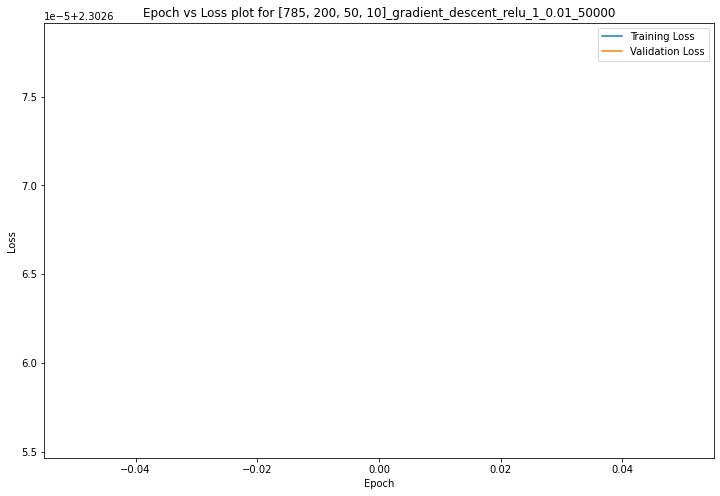

Training Accuracy: 8.44 %
Testing Accuracy: 8.84 %


In [ ]:
# Testing

# mlp = MulitLayerPerceptron(layers = [784, 200, 50, 10], num_epochs = 1, learning_rate = 1e-2, activation_function = 'relu',  batch_size = None, optimizer = 'gradient_descent')
# mlp.fit(train_X, train_y, val_X, val_y)

mlp = MulitLayerPerceptron().load_model(f"{weights_folder}/[785, 200, 50, 10]_gradient_descent_relu_1_0.01_50000")
mlp.plot_losses()

training_accuracy = mlp.score(train_X, train_y) * 100
print("Training Accuracy:", training_accuracy, "%")

testing_accuracy = mlp.score(test_X, test_y) * 100
print("Testing Accuracy:", testing_accuracy, "%")

## **Using Different Configurations**

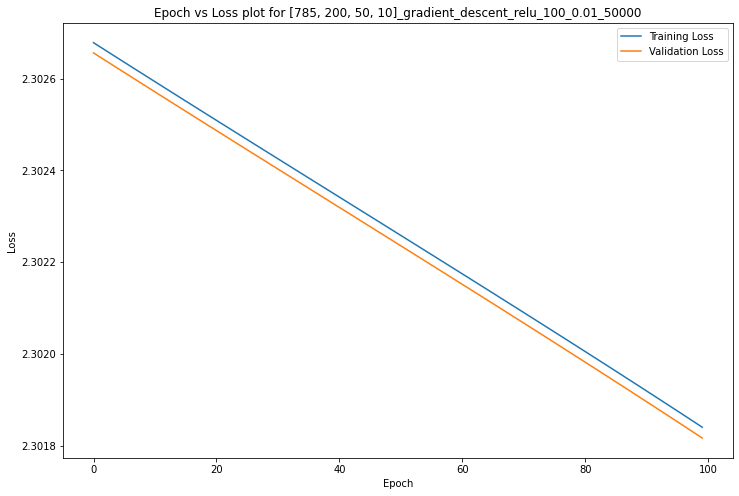

Training Accuracy: 22.594 %
Testing Accuracy: 23.34 %


In [ ]:
# mlp1 = MulitLayerPerceptron(layers = [784, 200, 50, 10], num_epochs = 100, learning_rate = 1e-2, activation_function = 'relu', batch_size = None, optimizer = 'gradient_descent')
# mlp1.fit(train_X, train_y, val_X, val_y)

mlp1 = MulitLayerPerceptron().load_model(f"{weights_folder}/[785, 200, 50, 10]_gradient_descent_relu_100_0.01_50000")
mlp1.plot_losses()

training_accuracy = mlp1.score(train_X, train_y) * 100
print("Training Accuracy:", training_accuracy, "%")

testing_accuracy = mlp1.score(test_X, test_y) * 100
print("Testing Accuracy:", testing_accuracy, "%")

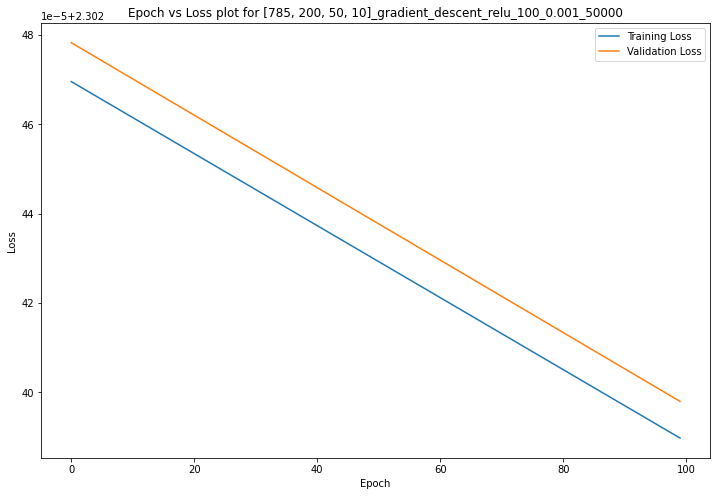

Training Accuracy: 9.158 %
Testing Accuracy: 9.3 %


In [ ]:
# mlp2 = MulitLayerPerceptron(layers = [784, 200, 50, 10], num_epochs = 100, learning_rate = 1e-3, activation_function = 'relu', batch_size = None, optimizer = 'gradient_descent')
# mlp2.fit(train_X, train_y, val_X, val_y)

mlp2 = MulitLayerPerceptron().load_model(f"{weights_folder}/[785, 200, 50, 10]_gradient_descent_relu_100_0.001_50000")
mlp2.plot_losses()

training_accuracy = mlp2.score(train_X, train_y) * 100
print("Training Accuracy:", training_accuracy, "%")

testing_accuracy = mlp2.score(test_X, test_y) * 100
print("Testing Accuracy:", testing_accuracy, "%")

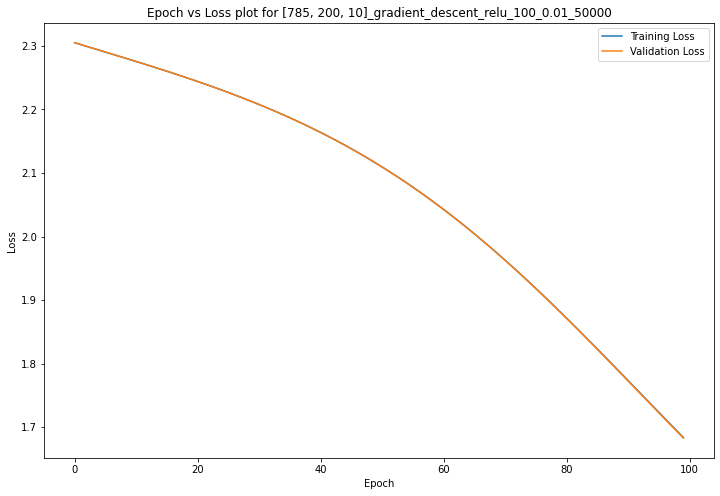

Training Accuracy: 56.274 %
Testing Accuracy: 56.35 %


In [ ]:
# mlp3 = MulitLayerPerceptron(layers = [784, 200, 10], num_epochs = 100, learning_rate = 1e-2, activation_function = 'relu', batch_size = None, optimizer = 'gradient_descent')
# mlp3.fit(train_X, train_y, val_X, val_y)

mlp3 = MulitLayerPerceptron().load_model(f"{weights_folder}/[785, 200, 10]_gradient_descent_relu_100_0.01_50000")
mlp3.plot_losses()

training_accuracy = mlp3.score(train_X, train_y) * 100
print("Training Accuracy:", training_accuracy, "%")

testing_accuracy = mlp3.score(test_X, test_y) * 100
print("Testing Accuracy:", testing_accuracy, "%")

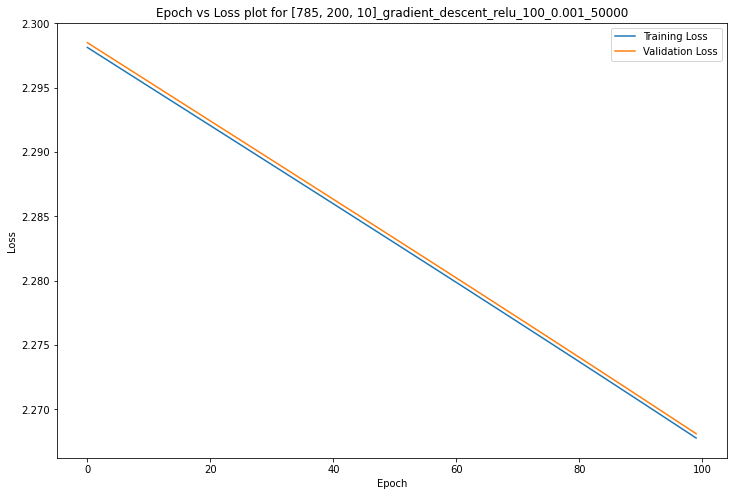

Training Accuracy: 38.086 %
Testing Accuracy: 38.29 %


In [ ]:
# mlp4 = MulitLayerPerceptron(layers = [784, 200, 10], num_epochs = 100, learning_rate = 1e-3, activation_function = 'relu', batch_size = None, optimizer = 'gradient_descent')
# mlp4.fit(train_X, train_y, val_X, val_y)

mlp4 = MulitLayerPerceptron().load_model(f"{weights_folder}/[785, 200, 10]_gradient_descent_relu_100_0.001_50000")
mlp4.plot_losses()

training_accuracy = mlp4.score(train_X, train_y) * 100
print("Training Accuracy:", training_accuracy, "%")

testing_accuracy = mlp4.score(test_X, test_y) * 100
print("Testing Accuracy:", testing_accuracy, "%")

## Inference from running above set of configurations
***It is evident that our model learns best for layer size [784, 200, 10] and learning rate 1e-2***

## **Running for higher number of epochs**

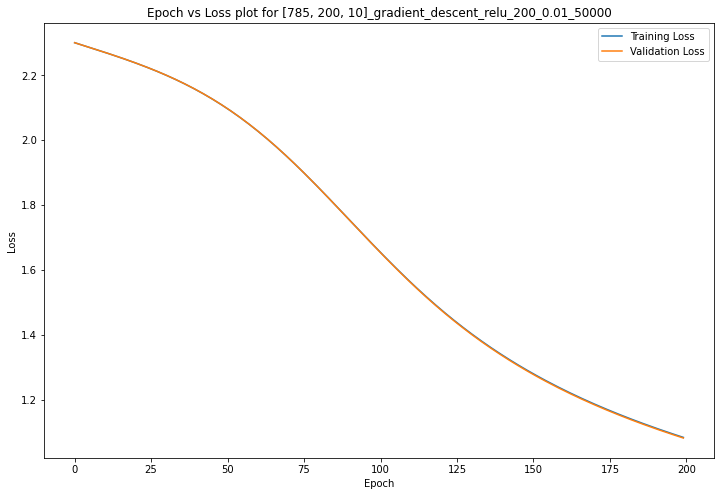

Training Accuracy: 65.774 %
Testing Accuracy: 65.75 %


In [ ]:
# mlp5 = MulitLayerPerceptron(layers = [784, 200, 10], num_epochs = 200, learning_rate = 1e-2, activation_function = 'relu', batch_size = None, optimizer = 'gradient_descent')
# mlp5.fit(train_X, train_y, val_X, val_y)

mlp5 = MulitLayerPerceptron().load_model(f"{weights_folder}/[785, 200, 10]_gradient_descent_relu_200_0.01_50000")
mlp5.plot_losses()

training_accuracy = mlp5.score(train_X, train_y) * 100
print("Training Accuracy:", training_accuracy, "%")

testing_accuracy = mlp5.score(test_X, test_y) * 100
print("Testing Accuracy:", testing_accuracy, "%")

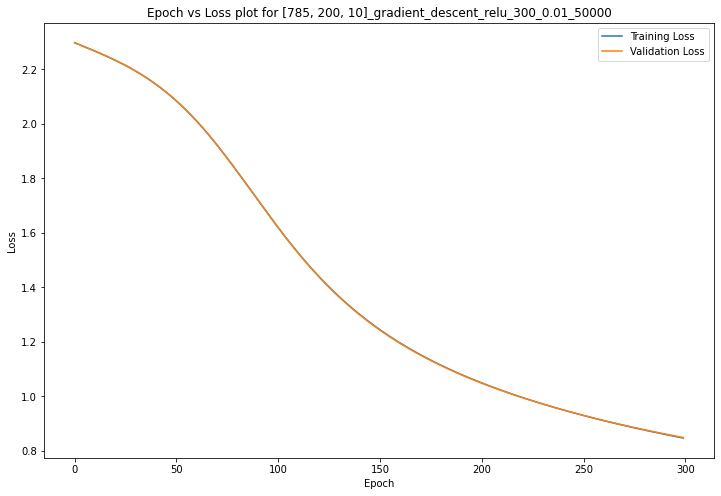

Training Accuracy: 72.304 %
Testing Accuracy: 72.0 %


In [ ]:
# mlp6 = MulitLayerPerceptron(layers = [784, 200, 10], num_epochs = 300, learning_rate = 1e-2, activation_function = 'relu', batch_size = None, optimizer = 'gradient_descent')
# mlp6.fit(train_X, train_y, val_X, val_y)

mlp6 = MulitLayerPerceptron().load_model(f"{weights_folder}/[785, 200, 10]_gradient_descent_relu_300_0.01_50000")
mlp6.plot_losses()

training_accuracy = mlp6.score(train_X, train_y) * 100
print("Training Accuracy:", training_accuracy, "%")

testing_accuracy = mlp6.score(test_X, test_y) * 100
print("Testing Accuracy:", testing_accuracy, "%")

## **Using Different Activations**

Activation: relu


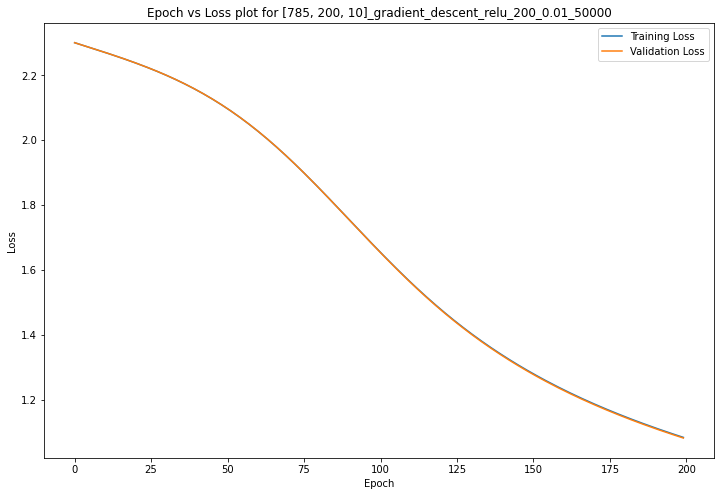

Training Accuracy: 65.774 %
Testing Accuracy: 65.75 %
Activation: tanh


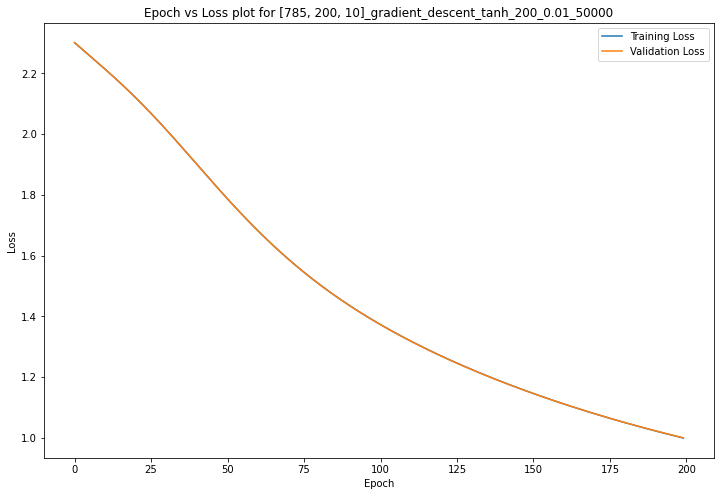

Training Accuracy: 70.128 %
Testing Accuracy: 70.11 %
Activation: sigmoid


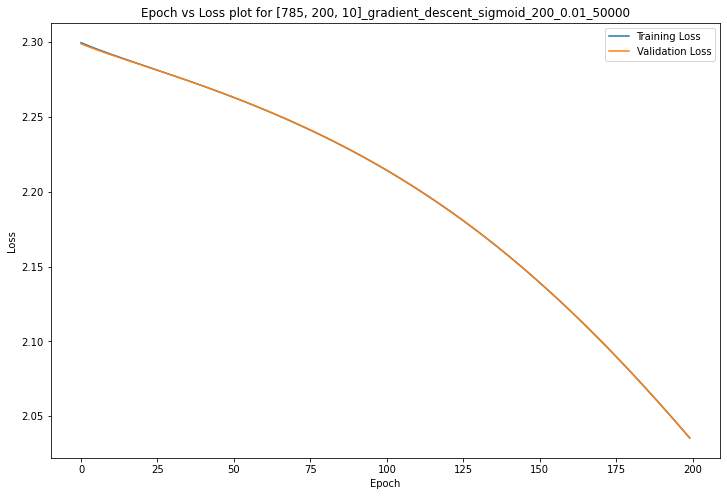

Training Accuracy: 58.977999999999994 %
Testing Accuracy: 59.13 %


In [ ]:
activations = ["relu", "tanh", "sigmoid"]
for activation in activations :
    print("Activation:", activation)

    # mlp_a = MulitLayerPerceptron(layers = [784, 200, 10], num_epochs = 200, learning_rate = 1e-2, activation_function = activation, batch_size = None, optimizer = 'gradient_descent')
    # mlp_a.fit(train_X, train_y, val_X, val_y)

    mlp_a = MulitLayerPerceptron().load_model(f"{weights_folder}/[785, 200, 10]_gradient_descent_{activation}_200_0.01_50000")
    mlp_a.plot_losses()

    training_accuracy = mlp_a.score(train_X, train_y) * 100
    print("Training Accuracy:", training_accuracy, "%")

    testing_accuracy = mlp_a.score(test_X, test_y) * 100
    print("Testing Accuracy:", testing_accuracy, "%")

## **Using Different Optimizers**

Optimizer: gradient_momentum


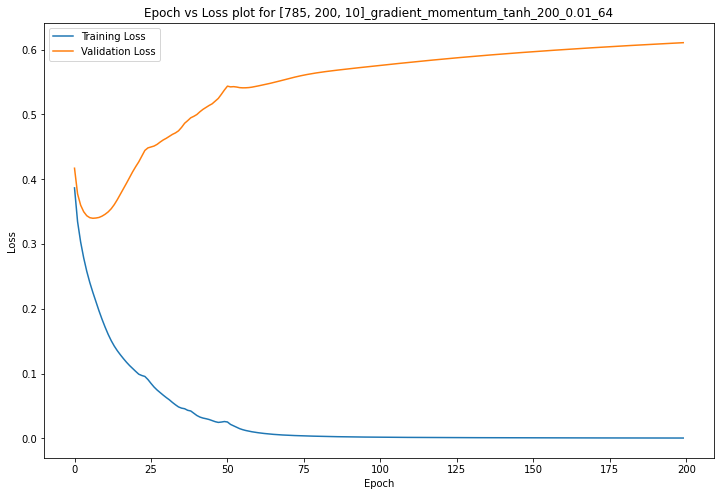

Training Accuracy: 100.0 %
Testing Accuracy: 89.01 %
Optimizer: nag


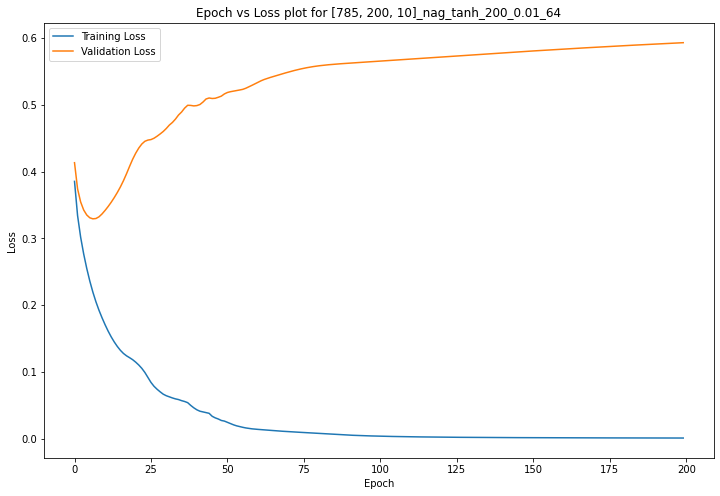

Training Accuracy: 100.0 %
Testing Accuracy: 89.08 %
Optimizer: adagrad


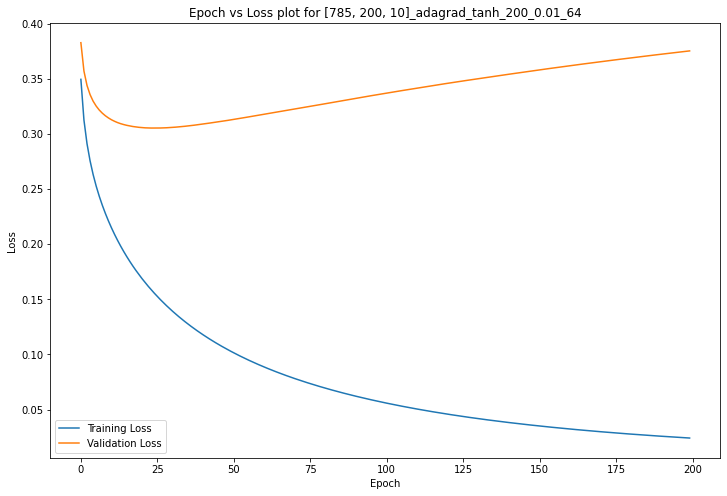

Training Accuracy: 99.86 %
Testing Accuracy: 89.64 %
Optimizer: rmsprop


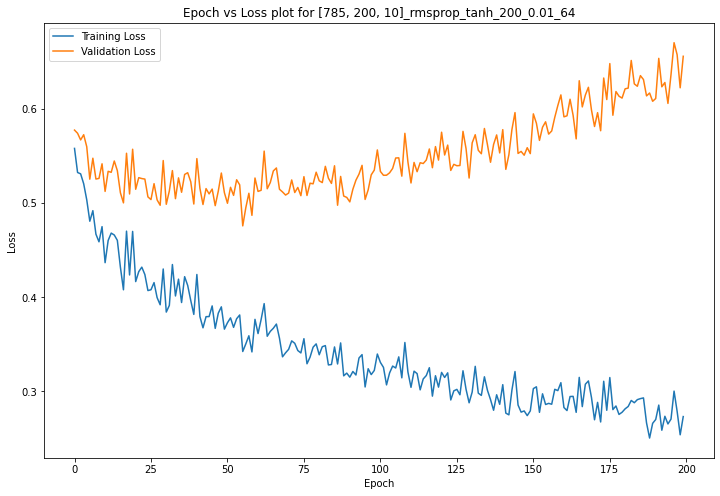

Training Accuracy: 91.608 %
Testing Accuracy: 85.42999999999999 %
Optimizer: adam


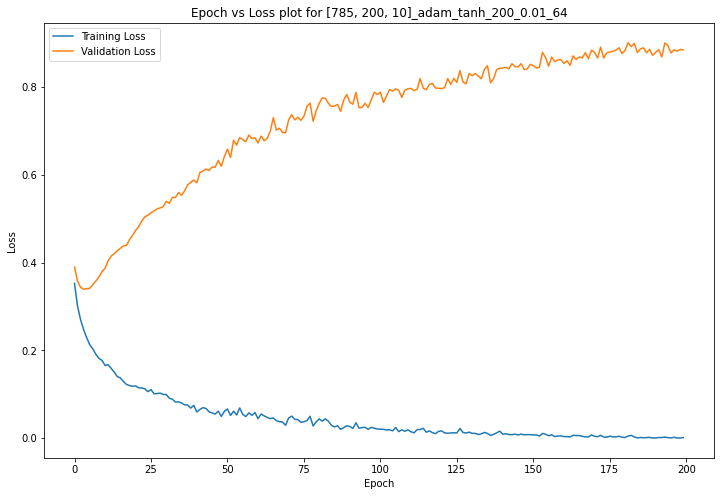

Training Accuracy: 99.958 %
Testing Accuracy: 88.06 %


In [ ]:
optimizers = ["gradient_momentum", "nag", "adagrad", "rmsprop", "adam"]
for optimizer in optimizers :
    print("Optimizer:", optimizer)

    # mlp_o = MulitLayerPerceptron(layers = [784, 200, 10], num_epochs = 200, learning_rate = 1e-2, activation_function = "tanh",  batch_size = 64, optimizer = optimizer)
    # mlp_o.fit(train_X, train_y, val_X, val_y)

    mlp_o = MulitLayerPerceptron().load_model(f"{weights_folder}/[785, 200, 10]_{optimizer}_tanh_200_0.01_64")
    mlp_o.plot_losses()

    training_accuracy = mlp_o.score(train_X, train_y) * 100
    print("Training Accuracy:", training_accuracy, "%")

    testing_accuracy = mlp_o.score(test_X, test_y) * 100
    print("Testing Accuracy:", testing_accuracy, "%")